In [84]:
import pandas as pd

datos = pd.read_csv('housing.csv')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

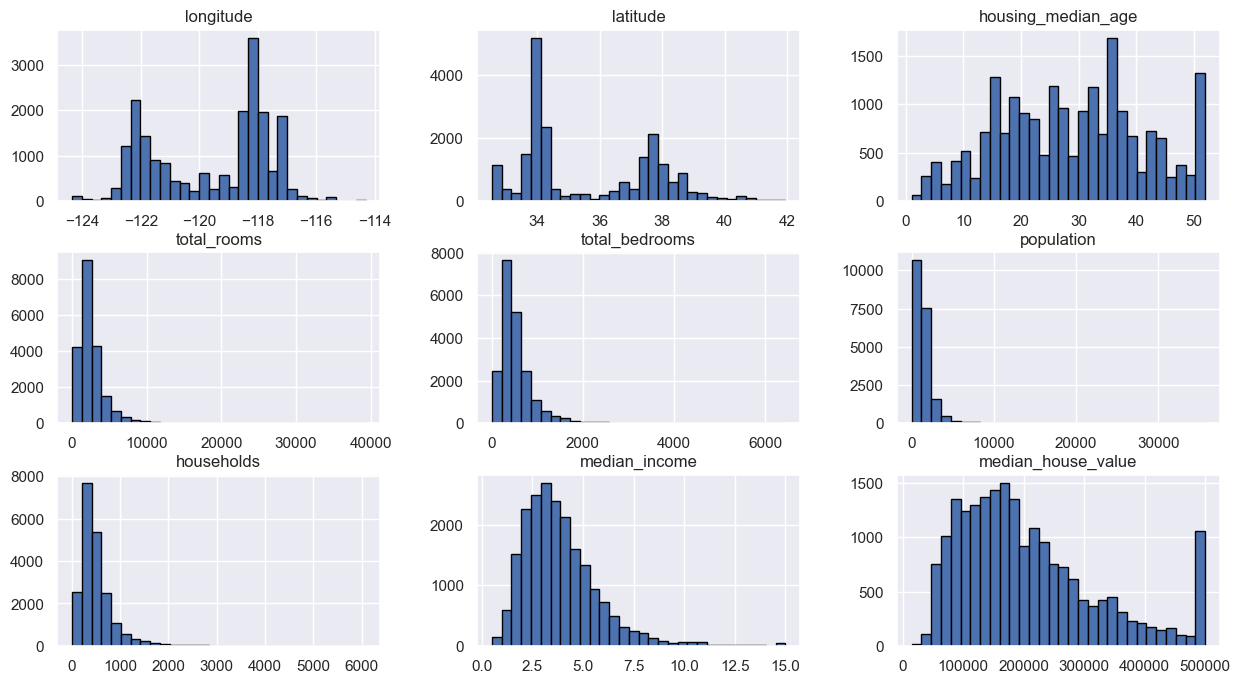

In [85]:
datos.hist(figsize=(15,8), bins=30, edgecolor='black')

In [86]:
datos_na = datos.dropna()

In [87]:
#Dummies / One-hot encoding

dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype=int)

In [88]:
datos_na = datos_na.join(dummies)

In [89]:
datos_na = datos_na.drop(['ocean_proximity'], axis=1)

<Axes: >

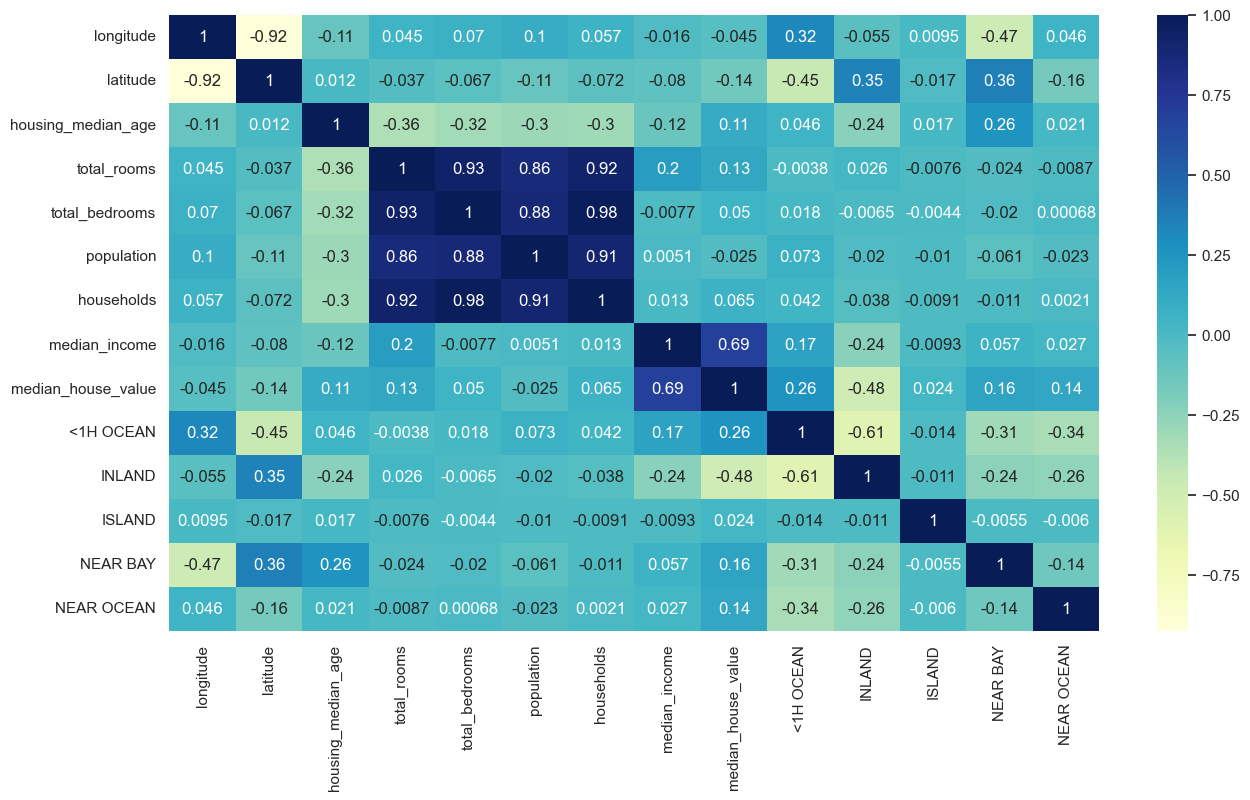

In [90]:
import seaborn as sb 
sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap='YlGnBu')

In [91]:
datos_na.corr()['median_house_value'].sort_values(ascending=False)

#podemos observar que la median_income es lo mas importante

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

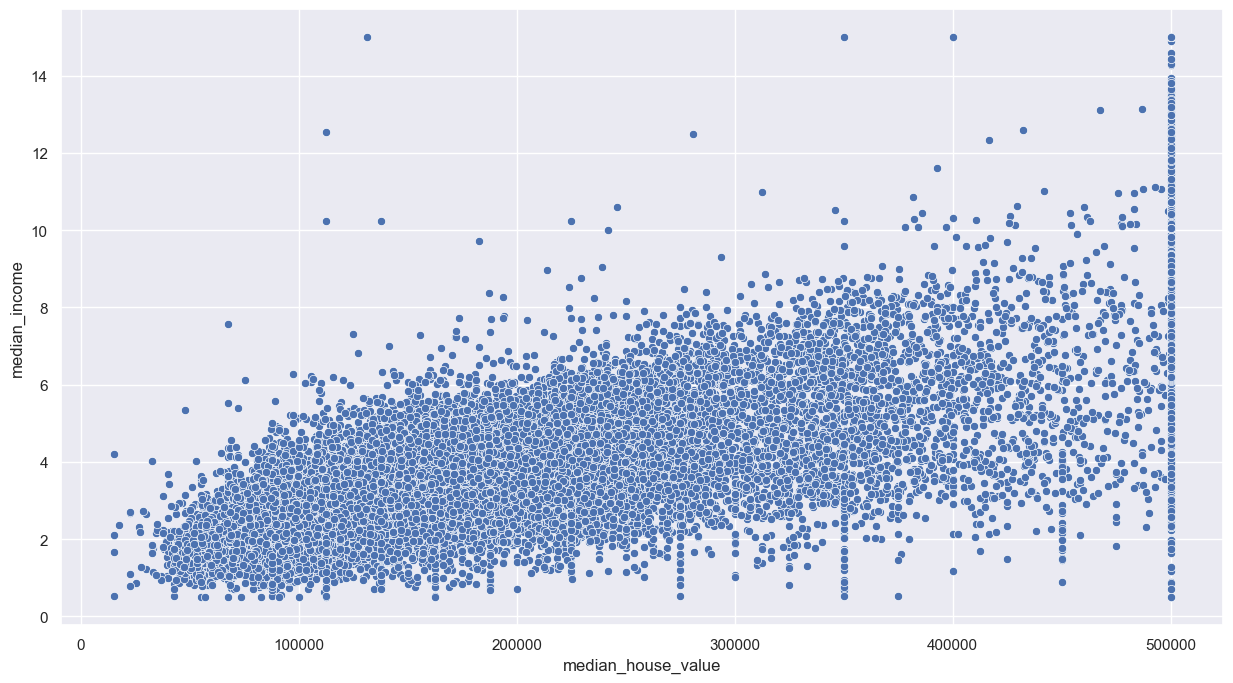

In [92]:
sb.scatterplot(x=datos_na['median_house_value'],y=datos_na['median_income'], data=datos_na)

<Axes: >

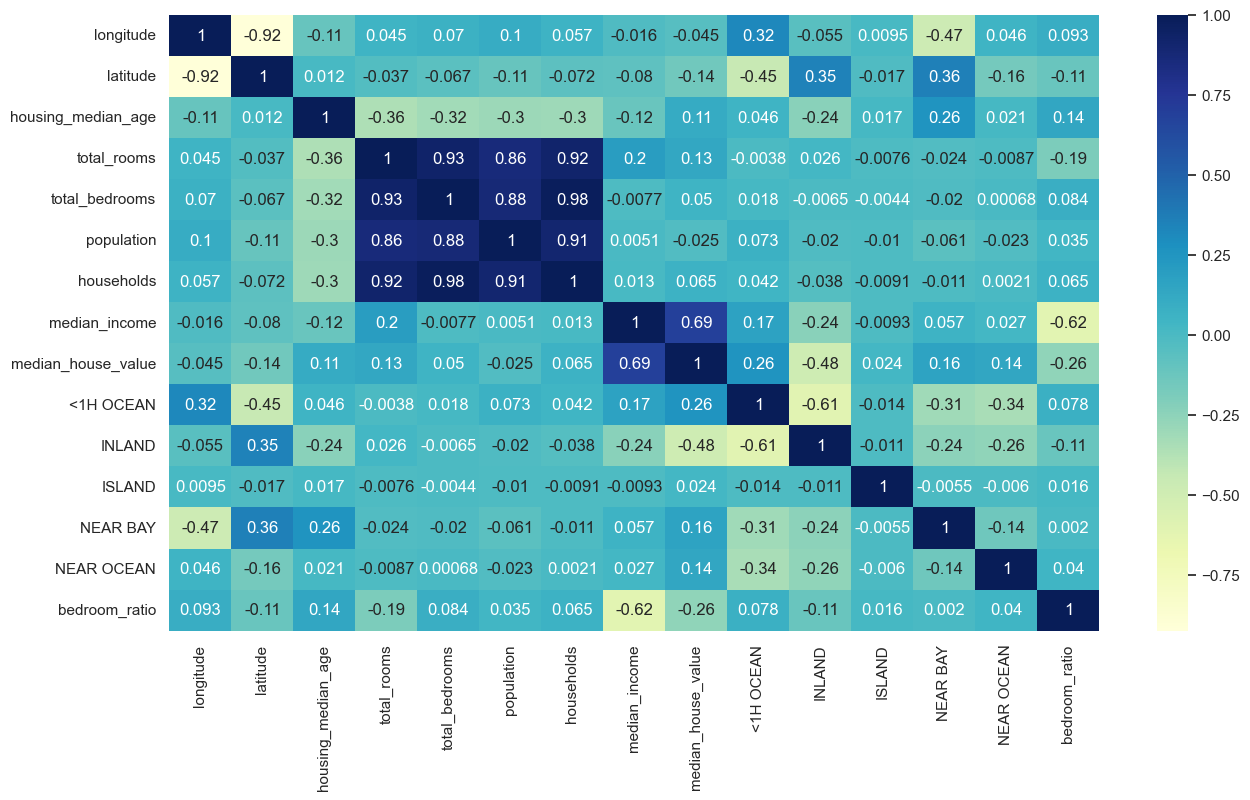

In [93]:
datos_na["bedroom_ratio"] = datos_na['total_bedrooms'] / datos_na['total_rooms']

sb.set(rc={'figure.figsize': (15,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap='YlGnBu')

In [94]:
#Separar las caracteristicas de la etiqueta
x = datos_na.drop(['median_house_value'], axis=1)
y = datos_na['median_house_value']

In [95]:
#Separar los datos en 2 partes: conjunto de entrenamiento y uno de prueba
from sklearn.model_selection import train_test_split

x_ent, x_pru, y_ent, y_pru = train_test_split(x, y, test_size=.2)

In [96]:
from sklearn.linear_model import LinearRegression

#Crear modelo
modelo = LinearRegression()

In [97]:
#Entrenar modelo
modelo.fit(x_ent,y_ent)

LinearRegression()

In [98]:
#Hacer predicciones
predicciones = modelo.predict(x_pru)

In [99]:
#Hacer diccionario para mostrar la prediccion junto a su valor real
comparativa = {"prediccion": predicciones, "Valor Real": y_pru}

pd.DataFrame(comparativa)

,prediccion,Valor Real
11419,286932.466247,290400.0
8298,284804.648030,408300.0
19155,273463.906419,253000.0
14514,217146.619465,176100.0
9597,141284.178111,95300.0
...,...,...
3990,362471.684920,374900.0
16755,211646.297611,232100.0
10559,235206.065367,225600.0
2627,157494.223032,100500.0


In [100]:
#Overfitting (cuando se aprende mucho los datos de entrenamiento)
print(modelo.score(x_ent,y_ent))
print(modelo.score(x_pru,y_pru))

0.655604179828442
0.6342473361391401


In [101]:
#Error
from sklearn.metrics import  mean_squared_error
import numpy as np 

#Tomar todos los datos y ver las diferencias elevadas al cuadrado
mse = mean_squared_error(y_pru,predicciones) #los elevamos al cuadrado para que los negativos se hagan positivos y las diferencias se vean notorias


In [140]:
mse

5014959539.621719

In [103]:
rmse = np.sqrt(mse) #Promedio de cuanto fallamos al calcular el precio de todas las casas

In [141]:
rmse

67271.93205987656

In [105]:
#Scaler Escalamiento
#Comprime los datos para que todos esten en un mismo rango y el modelo no le de mucha importancia a los numeros grandes.
datos_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Lo que estamos haciendo aqui es usar el scaler para hacer la modificacion y guardarlo en una variable
x_ent_esc = scaler.fit_transform(x_ent)
x_pru_esc = scaler.transform(x_pru)

pd.DataFrame(x_ent_esc) #Mostrar los datos organizados

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.931992,-0.722565,-1.477586,-0.300181,-0.198341,-0.277376,-0.288191,-0.045115,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,0.279111
1,0.897005,-0.890829,-1.557056,-0.220120,-0.526696,-0.425461,-0.458204,2.098346,1.123018,-0.680916,-0.011062,-0.352543,-0.387080,-1.145395
2,0.622103,-0.745935,1.462835,-0.712907,-0.807464,-0.878799,-0.800844,-0.452690,1.123018,-0.680916,-0.011062,-0.352543,-0.387080,-0.520986
3,0.577119,-0.727239,1.860189,-0.657693,-0.940709,-0.921499,-0.944701,5.917010,1.123018,-0.680916,-0.011062,-0.352543,-0.387080,-1.639018
4,-0.927343,1.404104,1.065481,-0.573491,-0.629010,-0.619879,-0.588983,-0.669337,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,-0.277627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,1.306858,-0.862785,-0.364994,0.357788,0.634444,0.469406,0.627262,-1.134408,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,0.390082
16342,-0.602459,1.287254,-1.080231,0.731404,0.662996,0.285890,0.637724,-0.825034,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,-0.343008
16343,0.787044,-0.699195,0.668127,-0.489289,-0.395830,0.177779,-0.390198,-0.480694,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,0.403198
16344,-1.197246,1.020836,-1.318644,1.774492,0.572580,0.891855,0.695267,2.366644,1.123018,-0.680916,-0.011062,-0.352543,-0.387080,-1.608381


In [107]:
pd.DataFrame(x_ent_esc) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.931992,-0.722565,-1.477586,-0.300181,-0.198341,-0.277376,-0.288191,-0.045115,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,0.279111
1,0.897005,-0.890829,-1.557056,-0.220120,-0.526696,-0.425461,-0.458204,2.098346,1.123018,-0.680916,-0.011062,-0.352543,-0.387080,-1.145395
2,0.622103,-0.745935,1.462835,-0.712907,-0.807464,-0.878799,-0.800844,-0.452690,1.123018,-0.680916,-0.011062,-0.352543,-0.387080,-0.520986
3,0.577119,-0.727239,1.860189,-0.657693,-0.940709,-0.921499,-0.944701,5.917010,1.123018,-0.680916,-0.011062,-0.352543,-0.387080,-1.639018
4,-0.927343,1.404104,1.065481,-0.573491,-0.629010,-0.619879,-0.588983,-0.669337,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,-0.277627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,1.306858,-0.862785,-0.364994,0.357788,0.634444,0.469406,0.627262,-1.134408,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,0.390082
16342,-0.602459,1.287254,-1.080231,0.731404,0.662996,0.285890,0.637724,-0.825034,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,-0.343008
16343,0.787044,-0.699195,0.668127,-0.489289,-0.395830,0.177779,-0.390198,-0.480694,-0.890457,1.468611,-0.011062,-0.352543,-0.387080,0.403198
16344,-1.197246,1.020836,-1.318644,1.774492,0.572580,0.891855,0.695267,2.366644,1.123018,-0.680916,-0.011062,-0.352543,-0.387080,-1.608381


Below are all the changes for the excercise 2 :)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>, <Axes: >]],
      dtype=object)

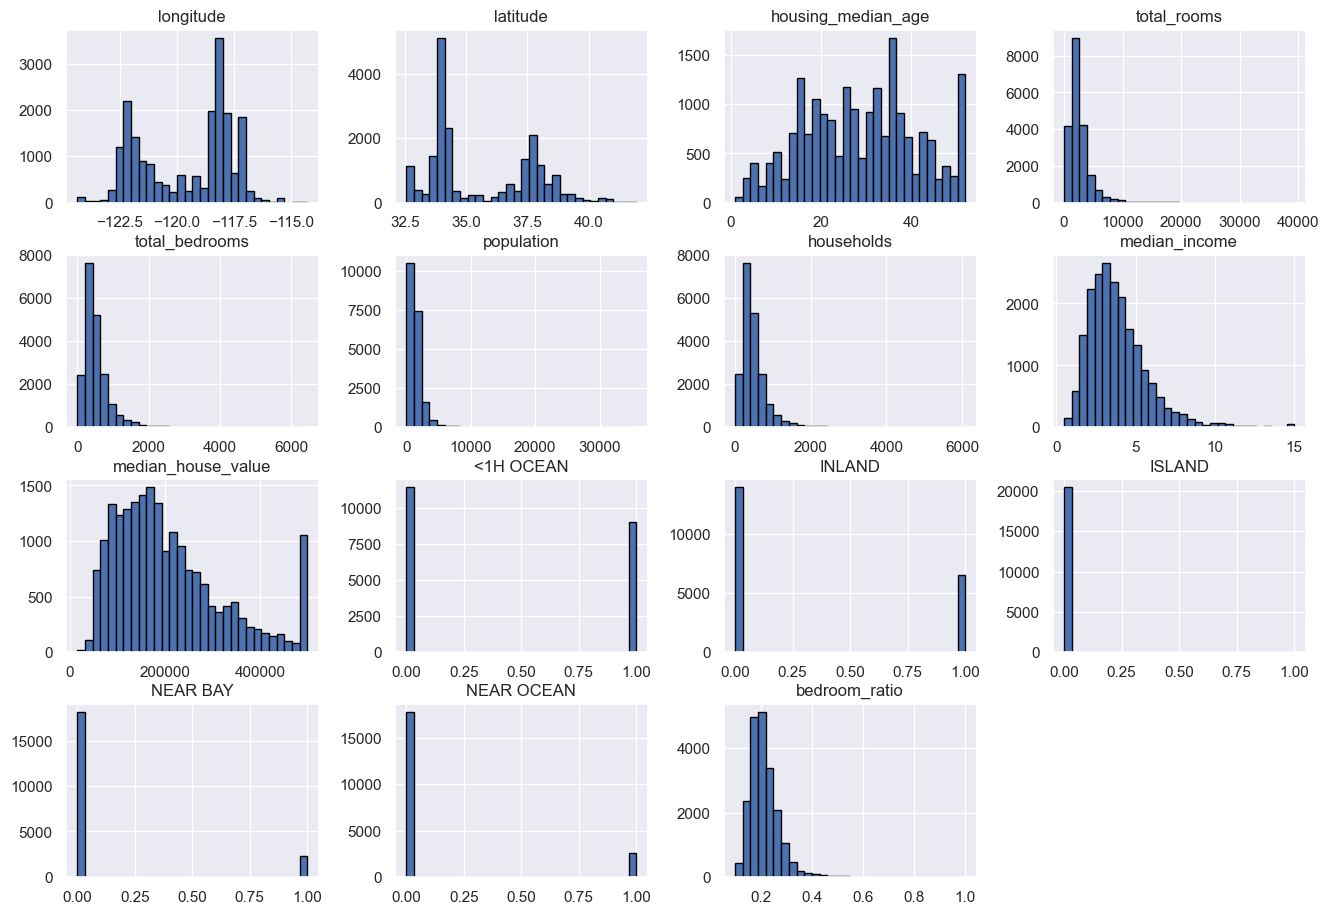

In [108]:
#Make histogram to see data that are limited.

datos_na.hist(figsize=(16,11), bins=30, edgecolor='black')

Limited data: Housing_median_age, median_house_value,

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

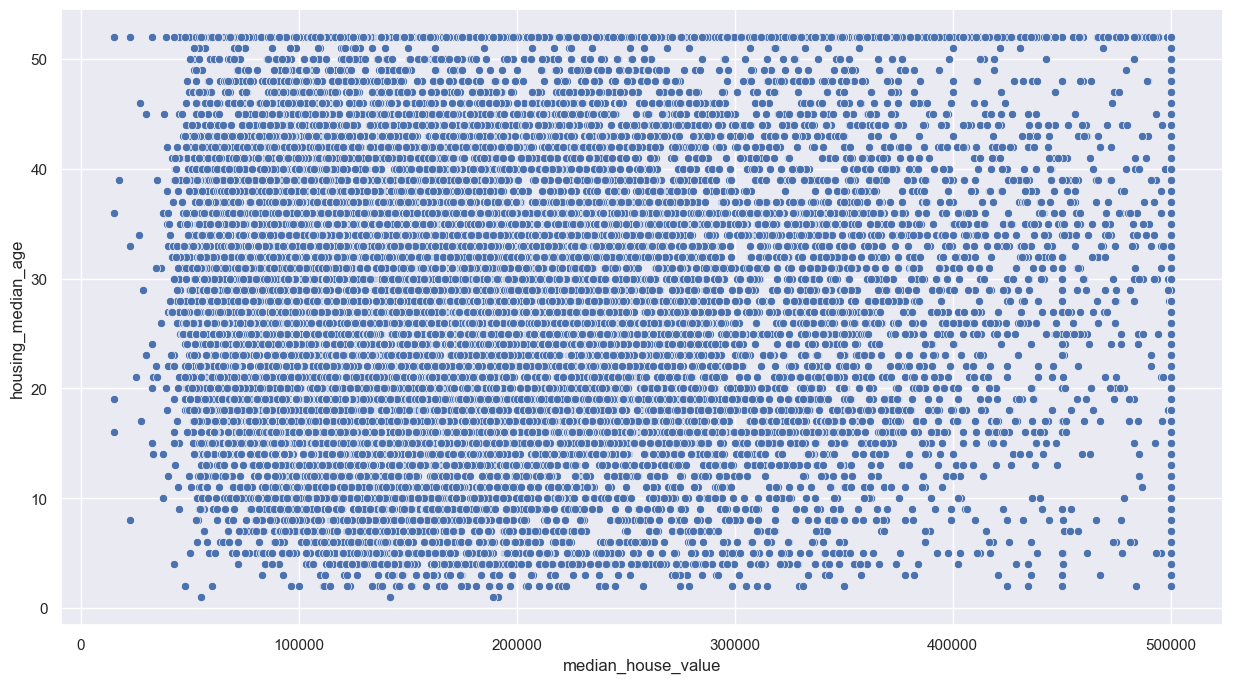

In [109]:
#Scatterplot to visualize the limit on the data.
sb.scatterplot(x=datos_na['median_house_value'],y=datos_na['housing_median_age'], data=datos_na)

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

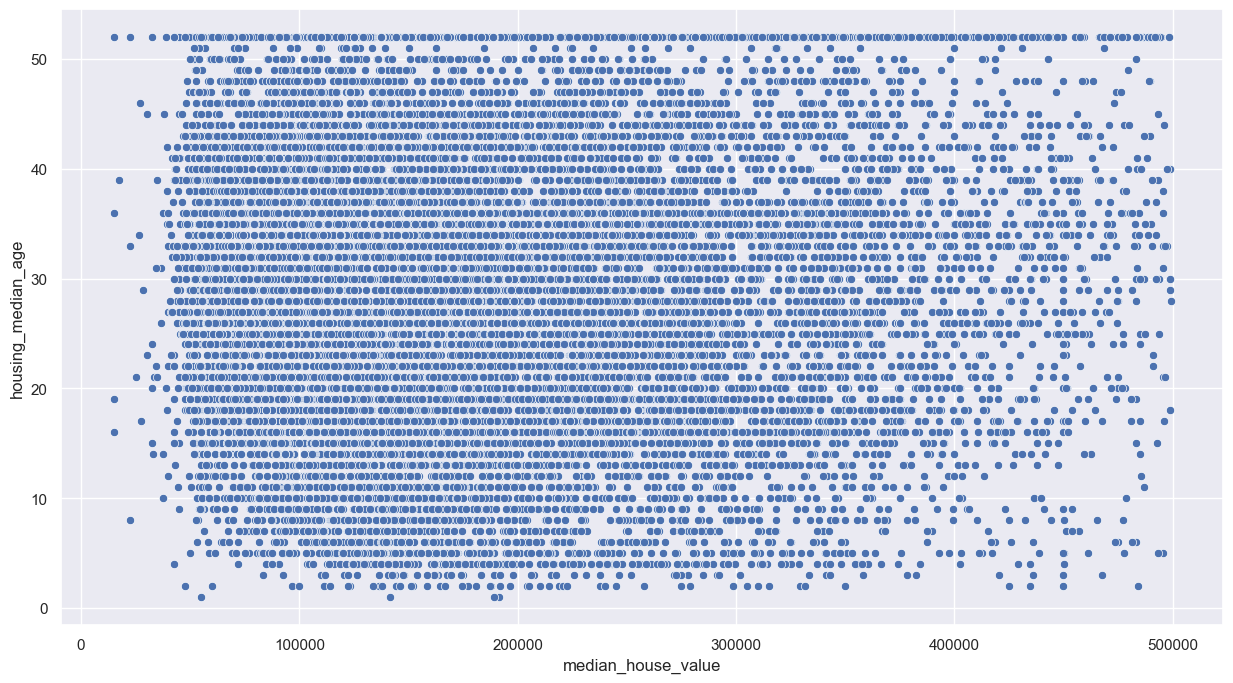

In [112]:
#Delete information where median house value is more than 500,000
fix_data = datos_na[(datos_na.median_house_value < 500000)]

sb.scatterplot(x=fix_data["median_house_value"], y=fix_data['housing_median_age'], data=datos_na)

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

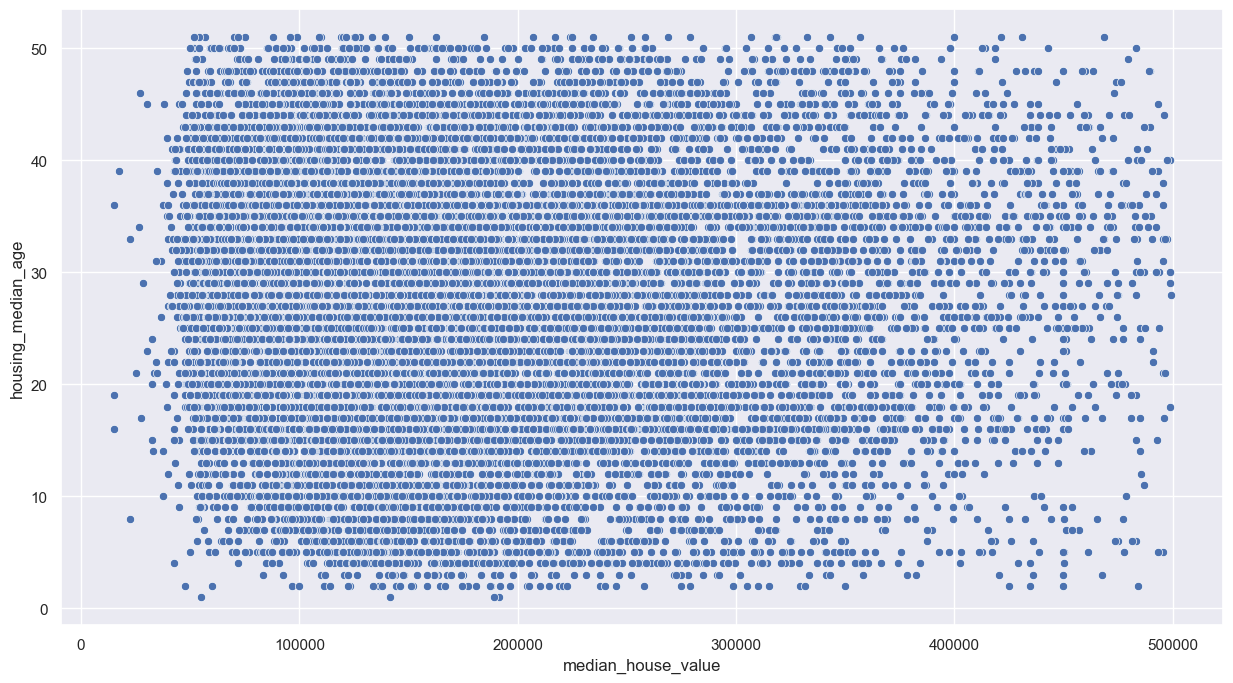

In [114]:
#Repeat with Housing_median_age
fix_data = datos_na[(datos_na.median_house_value < 500000)]
fix_data = fix_data[(fix_data.housing_median_age < 52)]

sb.scatterplot(x=fix_data["median_house_value"], y=fix_data['housing_median_age'], data=datos_na)



In [116]:
#Divide new data
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size=.2)

In [117]:
#Create model
fix_model = LinearRegression()

In [118]:
#Train new model
fix_model.fit(x_training,y_training)

LinearRegression()

In [119]:
#Predictions
predictions = modelo.predict(x_test)

In [120]:
#Compare values
compare = {"predictions": predictions, "Real value": y_test}

pd.DataFrame(compare)

,predictions,Real value
5147,152091.011212,90600.0
5440,198796.869394,362200.0
19810,54926.228193,143300.0
9312,307621.530476,433300.0
9032,376553.700058,500001.0
...,...,...
10937,187835.510824,159000.0
14549,297139.554543,329300.0
8243,153454.426352,100000.0
3088,74236.084164,59400.0


In [121]:
print(fix_model.score(x_training,y_training))
print(fix_model.score(x_test,y_test))

0.653660040536453
0.6449179086358822


In [124]:
fix_mse = mean_squared_error(y_test,predictions)

fix_mse

4525512843.068647

In [144]:
fix_rmse = np.sqrt(fix_mse) 

fix_rmse

67271.93205987656